# Prerequisites

## Install Library

In [181]:
# for python 3.11.4
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [ ]:
# Basic import
import pandas as pd
import numpy as np
import joblib
import os
import json
from datetime import datetime
import warnings

# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV, ParameterSampler, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (recall_score, precision_score, f1_score, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, classification_report, roc_curve, roc_auc_score, cohen_kappa_score)
from catboost import CatBoostClassifier

# Imbalanced learning
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.combine import SMOTETomek
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
warnings.filterwarnings('ignore')

## Read Data

In [183]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTrain_cleaned.csv", index_col=0)

In [184]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [185]:
df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month,year,is_weekend,is_weekday,time_diff,diff_days,diff_hours,diff_minutes,diff_seconds,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,514,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,28654,36.0788,-81.1781,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,37,0,1,1,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,78.773821
1,2019-01-01 00:00:44,630423337322,241,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,99160,48.8878,-118.2105,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,47,0,1,1,2019,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30.216618
2,2019-01-01 00:00:51,38859492057661,390,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,83252,42.1808,-112.2620,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,63,0,1,1,2019,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,108.102912
3,2019-01-01 00:01:16,3534093764340240,360,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,84,26,59632,46.2306,-112.1138,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,58,0,1,1,2019,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,95.685115
4,2019-01-01 00:03:06,375534208663984,297,41.96,Tyler,Garcia,1,408 Bradley Rest,216,45,24433,38.4207,-79.4629,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,39,0,1,1,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,77.702395


In [186]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour', 'day', 'month', 'year', 'is_weekend', 'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes', 'diff_seconds', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'distance'], dtype='object')

In [187]:
df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int64
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                                int64
state                               int64
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int64
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int64
hour                                int64
day                               

In [188]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_entertainment     0
category_food_

In [189]:
df_all = df.copy()

# Time-based split
split_time = df_all['trans_date_trans_time'].quantile(0.8)
df_train = df_all[df_all['trans_date_trans_time'] < split_time]
df_test = df_all[df_all['trans_date_trans_time'] >= split_time]

split_time_val = df_train['trans_date_trans_time'].quantile(0.8)
df_train_final = df_train[df_train['trans_date_trans_time'] < split_time_val]
df_val = df_train[df_train['trans_date_trans_time'] >= split_time_val]

In [190]:
df_train_final.shape, df_val.shape, df_test.shape

((829872, 48), (207468, 48), (259335, 48))

In [191]:
print("\n=== Original Class Distribution ===")
print(df_train_final['is_fraud'].value_counts())
print(f"Fraud percentage: {df_train_final['is_fraud'].mean()*100:.2f}%")


=== Original Class Distribution ===
is_fraud
0    825075
1      4797
Name: count, dtype: int64
Fraud percentage: 0.58%


# Model Pipeline

## 1. Features

### 1.1 Split Features and Target

In [192]:
columns_to_exclude = ['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud']

# Train
X_train = df_train_final.drop(columns_to_exclude, axis=1)
y_train = df_train_final["is_fraud"]

# Validation
X_val = df_val.drop(columns_to_exclude, axis=1)
y_val = df_val["is_fraud"]

# Test
X_test = df_test.drop(columns_to_exclude, axis=1)
y_test = df_test["is_fraud"]

### 1.2 Feature Scaling

In [193]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### 1.3 Feature Selection

In [194]:
# 1st: Select K Best (Find the 20 best features)
# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

Result from SelectKBest

In [195]:
# List the selected features from SelectKBest
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['amt', 'gender', 'unix_time', 'age', 'hour', 'month', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes', 'diff_seconds', 'category_entertainment', 'category_food_dining', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_personal_care', 'category_shopping_net'], dtype='object')


In [196]:
# 2nd: RFE (Recursive Feature Elimination)
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)
X_train_rfe = rfe.fit_transform(X_train_selected, y_train)
X_val_rfe = rfe.transform(X_val_selected)
X_test_rfe = rfe.transform(X_test_selected)

In [197]:
# Define the model pipeline for CatBoost
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(random_state=42, verbose=False, class_weights=[1, 170]))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('select_kbest', SelectKBest(k=20)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     n_features_to_select=10)),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x3df6a0950>)])

## 2. CatBoost

### 2.1 Find Best Parameters

#### GridSearch

In [199]:
fraud_ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Fraud ration (normal/frauld): {fraud_ratio:.2f}")

Fraud ration (normal/frauld): 172.00


In [204]:
# Define parameter grid for CatBoost
param_grid = {
    'catboost__iterations': [100, 200],
    'catboost__learning_rate': [0.05, 0.1],
    'catboost__depth': [6, 8],
    'catboost__l2_leaf_reg': [1, 3],
    'catboost__class_weights': [[1, 172], [1, 100]]
}

# Create pipeline for GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(random_state=42, verbose=False))
])

# GridSearchCV with balanced scoring
print("Starting GridSearchCV...")
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best params from GridSearch:", best_params)
print("Best GridSearch F1 Score:", grid_search.best_score_)

Starting GridSearchCV...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


Python(93281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(93286) Malloc

Best params from GridSearch: {'catboost__class_weights': [1, 100], 'catboost__depth': 8, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 3, 'catboost__learning_rate': 0.1}
Best GridSearch F1 Score: 0.3838845814566166


In [205]:
# Run GridSearchCV
print("GridSearchCV completed successfully!")
print("Best params from GridSearch:", best_params)
print("Best CV F1 Score:", grid_search.best_score_)

GridSearchCV completed successfully!
Best params from GridSearch: {'catboost__class_weights': [1, 100], 'catboost__depth': 8, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 3, 'catboost__learning_rate': 0.1}
Best CV F1 Score: 0.3838845814566166


In [206]:
# Build the best pipeline with the best parameters and train with the full training set
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(
        iterations=best_params['catboost__iterations'],
        learning_rate=best_params['catboost__learning_rate'],
        depth=best_params['catboost__depth'],
        l2_leaf_reg=best_params['catboost__l2_leaf_reg'],
        class_weights=best_params['catboost__class_weights'],
        random_state=42,
        verbose=False
    ))
])

In [207]:
X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)
best_pipeline.fit(X_trainval, y_trainval)

Pipeline(steps=[('scaler', StandardScaler()),
                ('select_kbest', SelectKBest(k=20)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     n_features_to_select=10)),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x34a915750>)])

In [208]:
# --- Display GridSearch Results ---
print("Best GridSearch Parameters:", best_params)
print("Best GridSearch F1 Score:", grid_search.best_score_)

Best GridSearch Parameters: {'catboost__class_weights': [1, 100], 'catboost__depth': 8, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 3, 'catboost__learning_rate': 0.1}
Best GridSearch F1 Score: 0.3838845814566166


### 2.2 Evaluate and Compare The Results

Classification Report

In [209]:
# Evaluate on test set (CatBoost returns 0/1 directly)
y_pred = best_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257797
           1       0.27      0.89      0.42      1538

    accuracy                           0.99    259335
   macro avg       0.64      0.94      0.71    259335
weighted avg       1.00      0.99      0.99    259335



Confusion Matrix

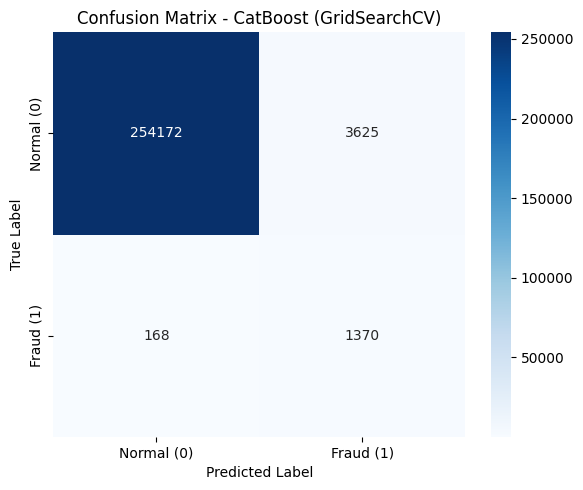

In [210]:
# Predicted values and true values for confusion matrix for GridSearch
y_true = y_test
y_pred_gridsearch = best_pipeline.predict(X_test)

# Build confusion matrix
cm_gridsearch = confusion_matrix(y_true, y_pred_gridsearch)
labels = ['Normal (0)', 'Fraud (1)']

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gridsearch, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix - CatBoost (GridSearchCV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [211]:
metrics = {
    "Method": ["GridSearch"],
    "Precision": [precision_score(y_test, y_pred_gridsearch)],
    "Recall": [recall_score(y_test, y_pred_gridsearch)],
    "F1-Score": [f1_score(y_test, y_pred_gridsearch)],
    "ROC-AUC": [roc_auc_score(y_test, best_pipeline.predict_proba(X_test)[:, 1])],
    "PR-AUC": [average_precision_score(y_test, best_pipeline.predict_proba(X_test)[:, 1])],
    "Cohen Kappa": [cohen_kappa_score(y_test, y_pred_gridsearch)]
}

df_metrics = pd.DataFrame(metrics)
display(df_metrics)

,Method,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Cohen Kappa
0,GridSearch,0.274274,0.890767,0.419409,0.99138,0.791044,0.414096


ROC Curve

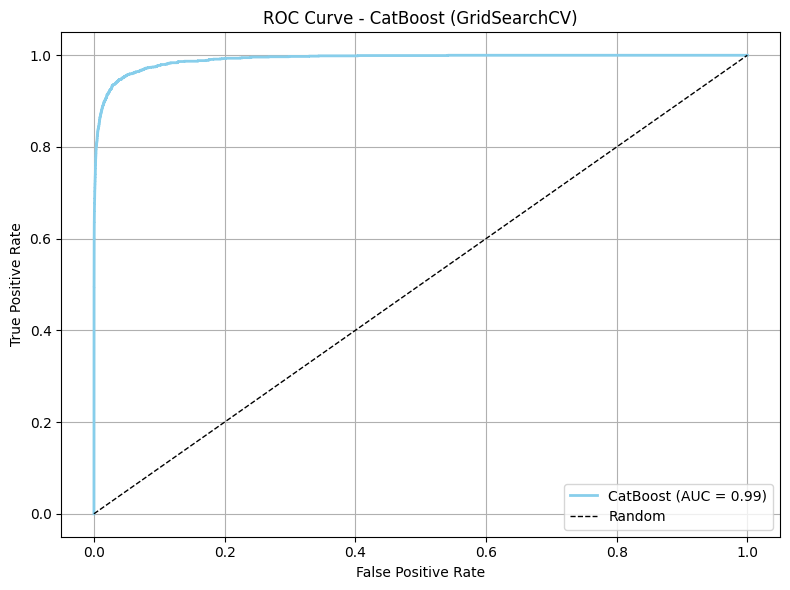

In [212]:
# --- Display ROC Curve ---
y_score = best_pipeline.predict_proba(X_test)[:, 1]

# Build ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'CatBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost (GridSearchCV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Precision-Recall Curve

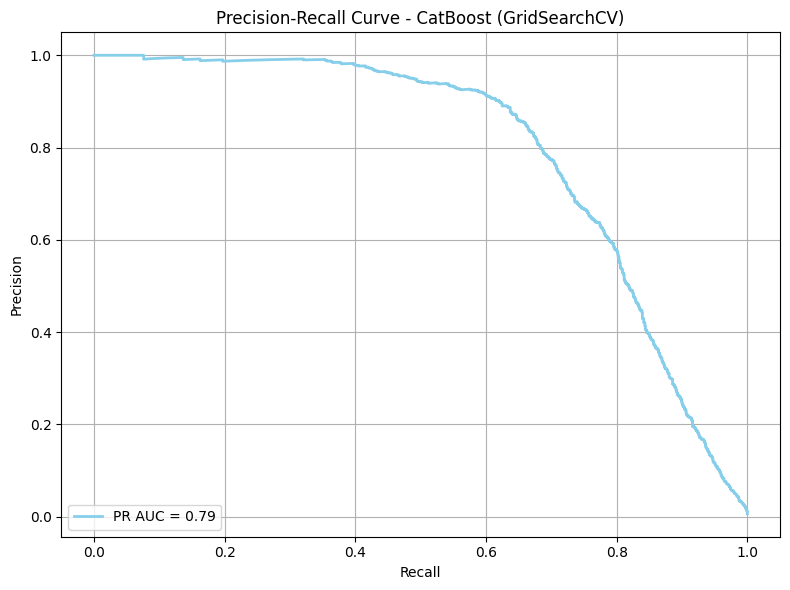

In [213]:
# --- Display Precision-Recall Curve ---
y_score = best_pipeline.predict_proba(X_test)[:, 1]

# สร้าง Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='skyblue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CatBoost (GridSearchCV)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

Metrics Comparison

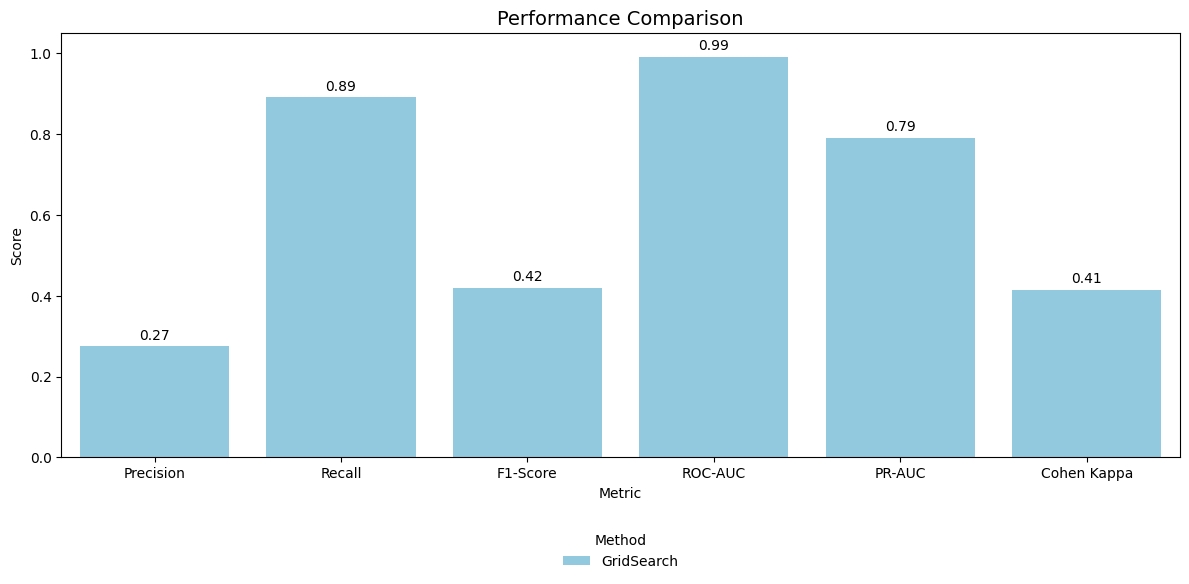

In [214]:
# --- Display Metrics Comparison ---
plt.figure(figsize=(12, 6))

df_melt = df_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")
ax = sns.barplot(data=df_melt, x="Metric", y="Score", hue="Method", palette=["skyblue"])

# Annotate the bars with their values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )

plt.title("Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(
    title="Method",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()
plt.grid(False)
plt.show()

Overfitting Plot

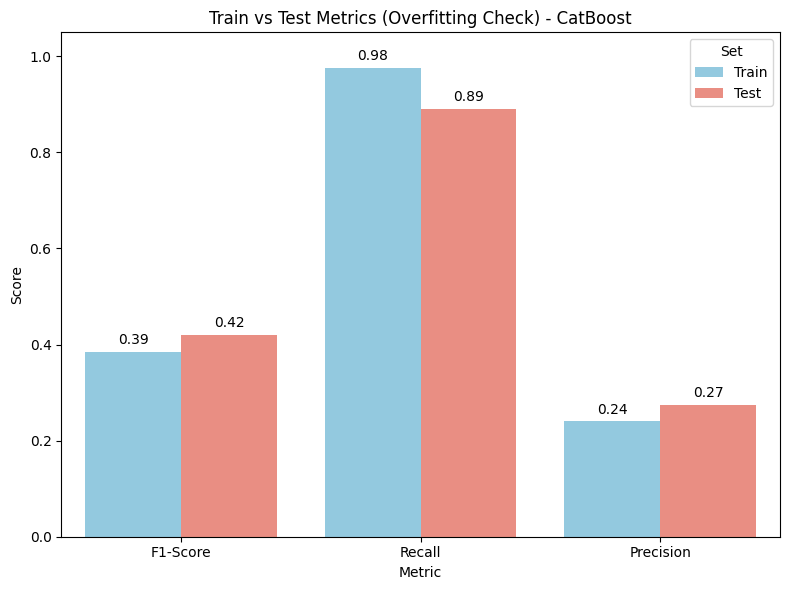

In [215]:
# --- Calculate metrics for train set ---
y_pred_train = best_pipeline.predict(X_trainval)
train_f1 = f1_score(y_trainval, y_pred_train)
train_recall = recall_score(y_trainval, y_pred_train)
train_precision = precision_score(y_trainval, y_pred_train)

# --- Calculate metrics for test set ---
y_pred_test = best_pipeline.predict(X_test)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

# --- Prepare DataFrame for plotting ---
df_overfit = pd.DataFrame({
    "Metric": ["F1-Score", "Recall", "Precision"],
    "Train": [train_f1, train_recall, train_precision],
    "Test": [test_f1, test_recall, test_precision]
})

df_overfit = df_overfit.melt(id_vars="Metric", var_name="Set", value_name="Score")

# --- Plot ---
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_overfit, x="Metric", y="Score", hue="Set", palette=["skyblue", "salmon"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Train vs Test Metrics (Overfitting Check) - CatBoost")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.tight_layout()
plt.grid(False)
plt.show()

### 2.3 Save Model

In [216]:
# 1. Save full pipeline with all preprocessing steps
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(**{k.replace('catboost__', ''): v for k, v in best_params.items() if k.startswith('catboost__')}, random_state=42, verbose=False))
])

# Prepare data for fitting
X = df_train.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud'], axis=1)
y = df_train['is_fraud']

# Fit and save pipeline
full_pipeline.fit(X, y)
joblib.dump(full_pipeline, "catboost_timebased.joblib")

# 2. Save best parameters
with open("params_CatBoost_fromGridSearch.json", "w") as f:
    json.dump(best_params, f)

# 3. Save model with parameters
save_dict = {
    "pipeline": full_pipeline,
    "params": best_params
}
joblib.dump(save_dict, "CatBoost_with_params.joblib")

['CatBoost_with_params.joblib']

# Model Testing

In [217]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTest_cleaned.csv", index_col=0)
loaded_pipeline = joblib.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/catboost_timebased.joblib")

In [218]:
# Random sample for testing
# sample_df = df.sample(n=50, random_state=42).copy()
sample_df = df.sample(100).copy()
X_sample = sample_df.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud'], axis=1)

In [219]:
predictions = loaded_pipeline.predict(X_sample)
predicted_result = predictions  # CatBoost returns 0/1 directly

In [220]:
# Calculate fraud probability
fraud_probability = loaded_pipeline.predict_proba(X_sample)[:, 1]

# Add predictions and fraud probability to sample_df
sample_df['predicted_result'] = predicted_result
sample_df['fraud_probability'] = fraud_probability

# Select columns to display
columns_to_show = [
    'trans_date_trans_time', 'trans_num', 'cc_num',  'first', 'last', 'merchant', 'amt',
    'is_fraud', 'predicted_result', 'fraud_probability'
]
display(sample_df[columns_to_show].reset_index(drop=True))

,trans_date_trans_time,trans_num,cc_num,first,last,merchant,amt,is_fraud,predicted_result,fraud_probability
0,2020-09-30 17:04:15,1a27fc88abee127353eb0f47a2acf380,4010002218955876,Jennifer,Bishop,690,120.75,0,0,0.185052
1,2020-12-20 04:06:41,16f04736b8c7c3d98e719faf7d956585,6596735789587928,Spencer,Williams,400,4.91,0,0,0.184600
2,2020-11-16 14:44:39,db7ecf22683c96ce445b2aad42e6f7ed,4587657402165341815,Amber,Lewis,418,6.11,0,0,0.184866
3,2020-09-13 14:24:08,f4d4156db4848e26fbd75afbb1e05d40,4265776278887457,Christine,Best,343,11.28,0,0,0.184562
4,2020-07-13 13:57:10,6df5e0cd8a68efc7dca8fdef478c6d9b,3566094707272327,Kristina,Stewart,422,43.79,0,0,0.184579
...,...,...,...,...,...,...,...,...,...,...
95,2020-08-08 04:35:32,f48d17c235eef3beb0a5dcd3fdbbaf92,4797297220948468262,Erica,Briggs,474,39.84,0,0,0.184578
96,2020-09-29 23:17:15,6fe4c8add08bdeff34d125c21d11404c,4792627764422477317,Margaret,Mendez,251,20.85,0,0,0.184803
97,2020-12-19 19:16:48,b5d39e87bed29dfb59d9fe3424f2e721,2283743876903625,Shannon,Williams,114,70.14,0,0,0.185809
98,2020-10-25 22:33:46,300a3795d4e3c5943c91d066d873f8a3,4292902571056973207,Jeffrey,Smith,638,217.00,0,0,0.192802
